In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use('ggplot')
import random
from random import randint
import math

In [2]:
food_amount = 100
pacman_amount = 1
board_size = 100
default_health = 5
pacmen = []
food = []
crot = 1
cloc =.2
cbite = 1
turn_loss = 1
phi_prec = (80/255.)
alpha_prec = 10/255.
delta_prec = 10/255.
pacman_radius = 1
food_health = 5

In [3]:
class pacman:
    def __init__(self):
        #change dynamically
        self.x = randint(0,board_size)
        self.y = randint(0,board_size)
        self.theta = randint(0,359)
        self.health = default_health
        #dna
        self.phi = randint(0,255)
        self.alpha = randint(0,255)
        self.delta = randint(0,255)
        
        self.phi_val = self.phi*phi_prec
        self.alpha_val = self.alpha*alpha_prec
        self.delta_val = self.delta*delta_prec
        #self.f = closest food
        #self.dist = closest food distance
    def __bool__(self):
        return True
    
    def __repr__(self):
        return "{pacman, x:"+str(self.x)+", y:"+str(self.y)+", phi:"+str(self.phi)+"}"
    
    def find_dist(self,f):
        return np.sqrt((self.x-f.x)**2 + (self.y-f.y)**2)
    
    def find_angle(self,f):
        dx = f.x - self.x
        dy = f.y - self.y
        theta1 = 360. - self.theta - math.degrees(math.atan((dx/dy)))
        theta2 = 360. - self.theta - theta1
        print(theta1)
        if(theta1 < theta2):
            return theta1
        return theta2
    
    def check_angle(self,f):#check if the food is in the range
        left_bound = self.theta - (self.phi_val/2)
        right_bound = self.theta + (self.phi_val/2)
        f_angle = self.find_angle(f)
        if(left_bound > f_angle and right_bound < f_angle):
            return True
        if(left_bound > f_angle + 360. and right_bound < f_angle + 360.):
            return True
        return False
        
    def find_food(self):
        global food
        closest = False
        closest_dist = False
        for i in food:
            dist = self.find_dist(i)
            if((dist < closest_dist or not closest_dist) and (self.check_angle(i)) or True):
                closest = i
                closest_dist = dist
            self.f = closest
            self.dist = closest_dist
        if(closest != False):
            return True
        return False
        
    def rotate_to_food(self):
        #cost of rotate = crot*theta*health
        #no cost to rotation
        new_theta = self.find_angle(self.f)
        error = random.uniform(self.alpha_val/-2., self.alpha_val/2.)
        self.theta = new_theta + error
        
    def get_food(self):
        self.rotate_to_food()
        error = random.uniform(self.delta_val/-2., self.delta_val/2.)
        new_dist = self.dist + error
        angle = self.find_angle(self.f)
        self.x += new_dist*np.cos(angle)
        self.x = 400
        self.y += new_dist*np.sin(angle)
        cost = cloc*new_dist
        self.health -= cost
        #cost of rotate
    
    def bite(self):
        to_food = self.find_dist(self.f)
        self.health -= cbite
        if(to_food < pacman_radius):#means the bite was sucessful
            self.health += food_health
            food.remove(self.f)
            
    
    def random_rotate(self):
        self.theta = randint(0,359)
        #self.health += randint(-2,1)
    
    def step(self):
        self.health -= turn_loss
        if(self.find_food()):
            self.get_food()
            self.bite()
        self.random_rotate()
    
    
    def get_genes(self):
        return[self.phi,self.alpha,self.delta]
    
    def set_genes(self,genes):
        self.phi = genes[0]
        self.alpha = genes[1]
        self.delta = genes[2]
        
    def to_bits(self):
        genes = self.get_genes()
        split_genes = []
        for i in genes:
            bin_str = format(i, '#010b')
            bin_str = bin_str[2:]
            split_genes.append([bin_str[:4],bin_str[4:]])
        return split_genes
    
    def reproduce(self,other):
        son1 = pacman()
        son2 = pacman()
        son1_genes = []
        son2_genes = []
        mybits = self.to_bits()
        otherbits = other.to_bits()
        for i,v in enumerate(mybits):
            son1_gene = v[0]+otherbits[i][1]
            son2_gene = otherbits[i][0]+v[1]
            son1_gene = int('0b'+son1_gene,base=2)
            son2_gene = int('0b'+son2_gene,base=2)
            son1_genes.append(son1_gene)
            son2_genes.append(son2_gene)
        son1.set_genes(son1_genes)
        son2.set_genes(son2_genes)
        return [son1,son2]
        
        
p = pacman()
p2 = pacman()
print(p.reproduce(p2))

[{pacman, x:56, y:62, phi:123}, {pacman, x:70, y:31, phi:173}]


In [4]:
class dot:
    def __init__(self):
        self.x = random.uniform(0, board_size)
        self.y = random.uniform(0, board_size)
    def __repr__(self):
        return "{dot, x:"+str(self.x)+", y:"+str(self.y)+"}"

In [5]:
def gen1():
    global pacmen
    pacmen = []
    for i in range(0,pacman_amount):
        p = pacman()
        pacmen.append(p)
    pacmen = np.array(pacmen)
    print(pacmen[0])
    return pacmen

def food1():
    global food
    food = []
    for i in range(0,food_amount):
        f = dot()
        food.append(f)
    food = np.array(food)
    return food

In [6]:
def driver(gen,life_span,generations):
    food = food1()
    dt = 1
    t = [0]
    tracker = []
    global pacmen
        
    for g in range(0,generations): #iterates through each generation
        tracker.append([])
        for i in range(0,len(pacmen)):
            tracker[g].append([])
        t.append(t[-1]+dt)
        for q in range(0,life_span): #runs through time with current generation
            for i,v in enumerate(pacmen):
                tracker[g][i].append([v.x,v.y,v.theta])
                v.step()
        
        
        #makes the next generation
        sons = []
        healthy_pacmen = []
        for i,v in enumerate(pacmen): #end of a generation mean reproduce
                if(v.health > 0):
                    healthy_pacmen.append(v)
        
        for i,v in enumerate(healthy_pacmen):
            if( i % 2 == 1):
                temp = v.reproduce(healthy_pacmen[i-1])
                sons.extend(temp)
                
        #print('generation over')
        pacmen = sons
    return t,tracker

{pacman, x:67, y:1, phi:224}
351.053249083
312.784381541
408.775357575
371.574572087
378.660274377
366.812026108
349.877295868
410.989175612
155.868392044
161.558317197
155.090954417
162.954039242
156.455284496
503.289717674
176.446873026
176.610746873
180.44328195
179.52955901
173.410768875
179.10120898
176.489483157
444.393742862
-9.34957627328
0.284873064717
-7.44048866548
-5.0599973524
-1.29466085433
-8.30553949662
-8.30553949662
298.409399573
287.183323536
296.297306648
289.399384958
292.004857121
294.369403928
288.191996587
288.191996587
240.868759046
267.987607318
277.501731115
270.02657929
272.513350205
275.77674351
269.026527468
269.026527468
227.957394705
169.986196608
179.500385907
172.0251186
174.511850806
177.775454456
171.025120597
171.025120597
227.6391871
248.910865358
258.428534765
250.947112258
253.431769711
256.706608456
249.949992277
249.949992277
228.043096045
275.752206744
285.406936204
277.622473819
279.969391311
283.870837128
276.796259495
276.796259495
219.7441

<IPython.core.display.Javascript object>


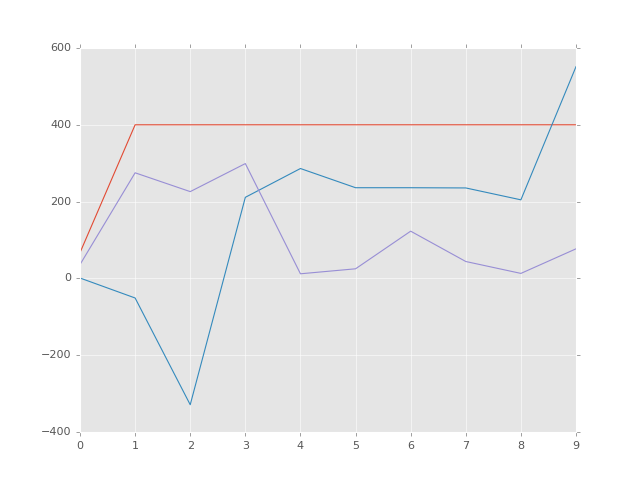

In [14]:
t,tracker = driver(gen1(),10,1)
print(tracker[0][0])
plt.plot(tracker[0][0])